# 1. 라이브러리 및 데이터

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

In [2]:
# 데이터 불러오기
train=pd.read_csv("movies_train.csv")
test=pd.read_csv("movies_test.csv")
submission=pd.read_csv("submission.csv")

# 2. EDA

In [3]:
pd.options.display.float_format = '{:.1f}'.format

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [5]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.0,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,342700.2,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4206610.7,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,691342.0,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.0,1,380,1


In [6]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [7]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [10]:
# 결측치 처리
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

# 3. 모델링
## 변수 선택

<AxesSubplot:>

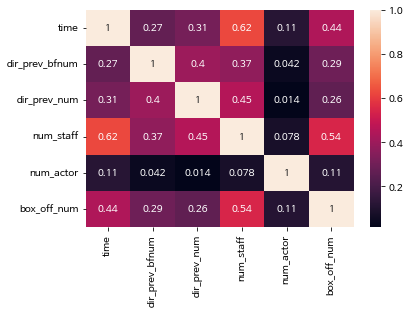

In [11]:
sns.heatmap(train.corr(), annot=True)

> num_staff > time > dir_prev_bfnum > dir_prev_num > num_actor 순의 box_off_num와의 상관관계


In [12]:
# 장르
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [13]:
train[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num')

,box_off_num
screening_rat,
전체 관람가,135100.5
청소년 관람불가,364181.3
12세 관람가,844980.9
15세 관람가,1247518.6


In [14]:
from sklearn.preprocessing import LabelEncoder
le_genre = LabelEncoder()
train['genre'] = le_genre.fit_transform(train['genre'])
test['genre'] = le_genre.transform(test['genre'])

In [15]:
le_rate = LabelEncoder()
train['screening_rat'] = le_rate.fit_transform(train['screening_rat'])
test['screening_rat'] = le_rate.transform(test['screening_rat'])

In [16]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,3,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,2,2015-11-19,130,3,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,10,2013-06-05,123,1,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,11,2012-07-12,101,2,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,11,2010-11-04,108,1,신근호,1.0,1,251,2,483387


In [17]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre', 'screening_rat']
target= ['box_off_num']

In [18]:
X_train, X_test, y_train = train[features], test[features], train[target]

## LightGBM with 하이퍼 파라미터 튜닝

In [19]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

model = LGBMRegressor(n_estimators=1000)

params = {
    'max_depth': [60, 120],
    'min_child_samples': [20, 40, 60],
    'num_leaves': [32, 48, 64]
}

gridcv = GridSearchCV(estimator=model,
                 param_grid = params,
                 scoring='neg_mean_squared_error',
                 cv = 5)

gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimators=1000),
             param_grid={'max_depth': [60, 120],
                         'min_child_samples': [20, 40, 60],
                         'num_leaves': [32, 48, 64]},
             scoring='neg_mean_squared_error')

In [20]:
gridcv.best_params_

{'max_depth': 60, 'min_child_samples': 60, 'num_leaves': 32}

In [21]:
model = LGBMRegressor(n_estimators=1000, max_depth=60, min_child_samples=60, num_leaves=32)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

preds = []
for model in models:
    preds.append(model.predict(X_test))

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.34844e+12
[100]	valid_0's l2: 1.80115e+12
[100]	valid_0's l2: 2.98363e+12
[100]	valid_0's l2: 1.83152e+12
[100]	valid_0's l2: 1.994e+12
[200]	valid_0's l2: 2.00026e+12


In [22]:
allLGBM = submission.copy()
allLGBM['box_off_num'] = model.predict(X_test)

In [23]:
allLGBM.to_csv('allLGBM.csv', index=False)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(X_train))

1757345424398.771

In [25]:
model = LGBMRegressor()

params = {
    'max_depth': [60, 120],
    'min_child_samples': [20, 40, 60],
    'num_leaves': [32, 48, 64],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [500, 1000, 1200]
}

gridcv = GridSearchCV(estimator=model,
                 param_grid = params,
                 scoring='neg_mean_squared_error',
                 cv = 5)

gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [60, 120],
                         'min_child_samples': [20, 40, 60],
                         'n_estimators': [500, 1000, 1200],
                         'num_leaves': [32, 48, 64]},
             scoring='neg_mean_squared_error')

In [26]:
gridcv.best_params_

{'learning_rate': 0.01,
 'max_depth': 60,
 'min_child_samples': 40,
 'n_estimators': 500,
 'num_leaves': 32}

In [27]:
model = LGBMRegressor(n_estimators=500, max_depth=60, min_child_samples=40, num_leaves=32, learning_rate=0.01)

k_fold = KFold(n_splits=5, shuffle=True)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

preds = []
for model in models:
    preds.append(model.predict(X_test))

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.60576e+12
[200]	valid_0's l2: 1.65805e+12
[100]	valid_0's l2: 2.2714e+12
[200]	valid_0's l2: 2.15134e+12
[300]	valid_0's l2: 2.12024e+12
[400]	valid_0's l2: 2.08732e+12
[500]	valid_0's l2: 2.08369e+12
[100]	valid_0's l2: 3.19425e+12
[200]	valid_0's l2: 2.99951e+12
[300]	valid_0's l2: 3.01328e+12
[100]	valid_0's l2: 1.36224e+12
[200]	valid_0's l2: 1.26842e+12
[300]	valid_0's l2: 1.27029e+12
[100]	valid_0's l2: 3.45794e+12
[200]	valid_0's l2: 3.2192e+12
[300]	valid_0's l2: 3.16336e+12
[400]	valid_0's l2: 3.09606e+12
[500]	valid_0's l2: 3.02435e+12


In [28]:
mean_squared_error(y_train, model.predict(X_train))

1897916927204.9226

## RandomForest with 하이퍼 파라미터 튜닝

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

params = {
    'max_depth': [60, 120],
    'min_child_samples': [20, 40, 60],
    'num_leaves': [32, 48, 64],
}

gridcv = GridSearchCV(estimator=model,
                 param_grid = params,
                 scoring='neg_mean_squared_error',
                 cv = 5)

gridcv.fit(X_train, y_train)

gridcv.best_params_

model = LGBMRegressor(n_estimators=500, max_depth=60, min_child_samples=40, num_leaves=32, learning_rate=0.01)

k_fold = KFold(n_splits=5, shuffle=True)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

preds = []
for model in models:
    preds.append(model.predict(X_test))

## 회귀 모델 with 하이퍼 파라미터 튜닝

In [2]:
train=pd.read_csv("movies_train.csv")
test=pd.read_csv("movies_test.csv")
submission=pd.read_csv("submission.csv")

train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


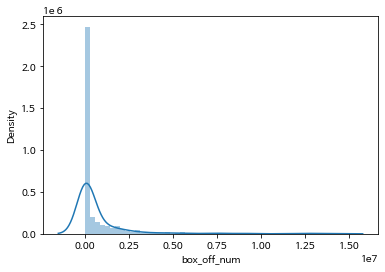

In [3]:
sns.distplot(train['box_off_num'])

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

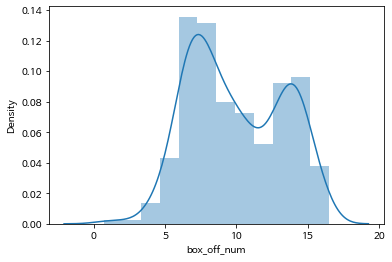

In [4]:
sns.distplot(np.log1p(train['box_off_num']))

In [5]:
train['box_off_num'] = np.log1p(train['box_off_num'])

In [6]:
train['year'] = train.release_time.apply(lambda x: x.year)
train['month'] = train.release_time.apply(lambda x: x.month)
train['day'] = train.release_time.apply(lambda x: x.day)

test['year'] = test.release_time.apply(lambda x: x.year)
test['month'] = test.release_time.apply(lambda x: x.month)
test['day'] = test.release_time.apply(lambda x: x.day)

In [7]:
train.drop(['title', 'release_time', 'director', 'year', 'day', 'distributor'], axis=1, inplace=True)
test.drop(['title', 'release_time', 'director', 'year', 'day', 'distributor'], axis=1, inplace=True)

In [8]:
train_ohe=pd.get_dummies(train)
test_ohe=pd.get_dummies(test)
print(train_ohe.shape)
print(test_ohe.shape)

(600, 23)
(243, 22)


In [9]:
X_train=train_ohe.drop(['box_off_num'], axis=1, inplace=False)
y_train=train_ohe['box_off_num']

X_test=test_ohe

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge_reg = Ridge()
lasso_reg = Lasso()

In [11]:
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10]}
lasso_params = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10]}

In [12]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

get_best_params(ridge_reg, ridge_params)
get_best_params(lasso_reg, lasso_params)

C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.05012e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.49434e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.858e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19682e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\minjipark\anaconda3\envs\ESAA\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Il

Ridge 5 CV 시 최적 평균 RMSE 값: 2.0373, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 2.0403, 최적 alpha:{'alpha': 0.01}


Lasso(alpha=0.01)

In [14]:
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=8)

In [15]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

In [16]:
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

In [17]:
ridge = submission.copy()
ridge['box_off_num'] = np.expm1(ridge_reg.predict(X_test))
ridge.to_csv('ridge.csv', index = False)

In [18]:
lasso = submission.copy()
lasso['box_off_num'] = np.expm1(lasso_reg.predict(X_test))
lasso.to_csv('lasso.csv', index=False)

In [56]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [55]:
lasso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        243 non-null    object 
 1   box_off_num  243 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [58]:
allLGBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        243 non-null    object 
 1   box_off_num  243 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB
